# Lab 5 - linear models

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cmdstanpy import CmdStanModel

data = pd.read_csv("Airline_data.csv")
data

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [117]:
model_ppc=CmdStanModel(stan_file='code1.stan')
# Define data dictionary
data_dict = {
    'N': len(data),
    'miles': data["Miles flown [100 mln miles]"].values
}
# Perform posterior predictive checks
sim = model_ppc.sample(data=data_dict, output_dir='output')
ppc_summary = sim.summary()
print(ppc_summary)

11:12:25 - cmdstanpy - INFO - compiling stan file /home/lab5/code1.stan to exe file /home/lab5/code1
11:12:36 - cmdstanpy - INFO - compiled model executable: /home/lab5/code1
11:12:36 - cmdstanpy - WARNING - Stan compiler has produced 3 warnings:
11:12:36 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab5/code1.hpp /home/lab5/code1.stan
Warning in '/home/lab5/code1.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/code1.stan', line 9, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/c


11:12:38 - cmdstanpy - INFO - CmdStan done processing.



                         Mean      MCSE     StdDev         5%        50%  \
alfa                   2.0000  0.000002   0.000099   1.999840   2.000000   
theta                  0.0002  0.000001   0.000080   0.000068   0.000199   
lambda[1]             16.7479  0.083272   5.266450   9.596750  15.948500   
lambda[2]             18.4819  0.102817   6.500900   9.884790  17.398800   
lambda[3]             21.8318  0.143364   9.061290  10.383200  20.109600   
lambda[4]             24.2661  0.174909  11.053000  10.707200  22.012700   
lambda[5]             26.2441  0.201715  12.745400  10.951200  23.522100   
lambda[6]             27.6425  0.221260  13.979400  11.114700  24.570800   
lambda[7]             26.6381  0.207174  13.090000  10.998000  23.819100   
lambda[8]             28.9230  0.239570  15.135300  11.258500  25.518400   
lambda[9]             38.7962  0.392542  24.793900  12.219000  32.472400   
lambda[10]            35.8125  0.344259  21.745200  11.952500  30.431000   
accidents_n

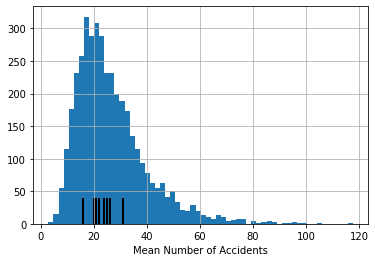

In [118]:
df = sim.draws_pd()
df["number_of_accidents_mean"] = df[[f"accidents_number[{i}]" for i in range(1, 11)]].mean(axis=1)
df["number_of_accidents_mean"].hist(bins='auto')
plt.bar(data["Fatal accidents"], [40 for _ in range(data["Fatal accidents"].size)], color = "black")
plt.xlabel("Mean Number of Accidents")
plt.show()


In [134]:
model_fit=CmdStanModel(stan_file='code2.stan')
# Define data dictionary
data_dict = {
    'N': len(data),
    'miles': data["Miles flown [100 mln miles]"].values,
    'accidents' : data["Fatal accidents"]
}
# Perform posterior predictive checks
sim2 = model_fit.sample(data=data_dict, output_dir='output')
ppc_summary_2 = sim2.summary()
print(ppc_summary_2)


11:26:44 - cmdstanpy - INFO - compiling stan file /home/lab5/code2.stan to exe file /home/lab5/code2
11:26:58 - cmdstanpy - INFO - compiled model executable: /home/lab5/code2
11:26:58 - cmdstanpy - WARNING - Stan compiler has produced 3 warnings:
11:26:58 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab5/code2.hpp /home/lab5/code2.stan
Warning in '/home/lab5/code2.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/code2.stan', line 4, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/c


11:26:59 - cmdstanpy - INFO - CmdStan done processing.



                            Mean          MCSE    StdDev          5%  \
lp__                  502.725000  3.530270e-02  1.007200  500.674000   
alfa                    1.900110  4.686110e-05  0.001008    1.898370   
theta                   0.000205  1.787870e-07  0.000011    0.000187   
lambda[1]              14.755300  1.017640e-02  0.629169   13.752600   
lambda[2]              16.139300  1.238520e-02  0.765947   14.921400   
lambda[3]              18.736100  1.680050e-02  1.039410   17.087800   
lambda[4]              20.566400  2.010240e-02  1.243940   18.594800   
lambda[5]              22.021900  2.282950e-02  1.412890   19.784500   
lambda[6]              23.035000  2.477710e-02  1.533550   20.609400   
lambda[7]              22.308600  2.337680e-02  1.446790   20.018300   
lambda[8]              23.951700  2.657280e-02  1.644810   21.352900   
lambda[9]              30.712700  4.068810e-02  2.519440   26.760200   
lambda[10]             28.722200  3.638400e-02  2.252730   25.1

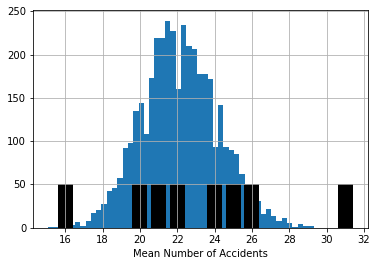

In [135]:
df_2 = sim2.draws_pd()
df_2["number_of_accidents_mean"] = df_2[[f"accidents_number[{i}]" for i in range(1, 11)]].mean(axis=1)
df_2["number_of_accidents_mean"].hist(bins=50)
plt.bar(data["Fatal accidents"], [50 for _ in range(data["Fatal accidents"].size)], color = "black")
plt.xlabel("Mean Number of Accidents")
plt.show()

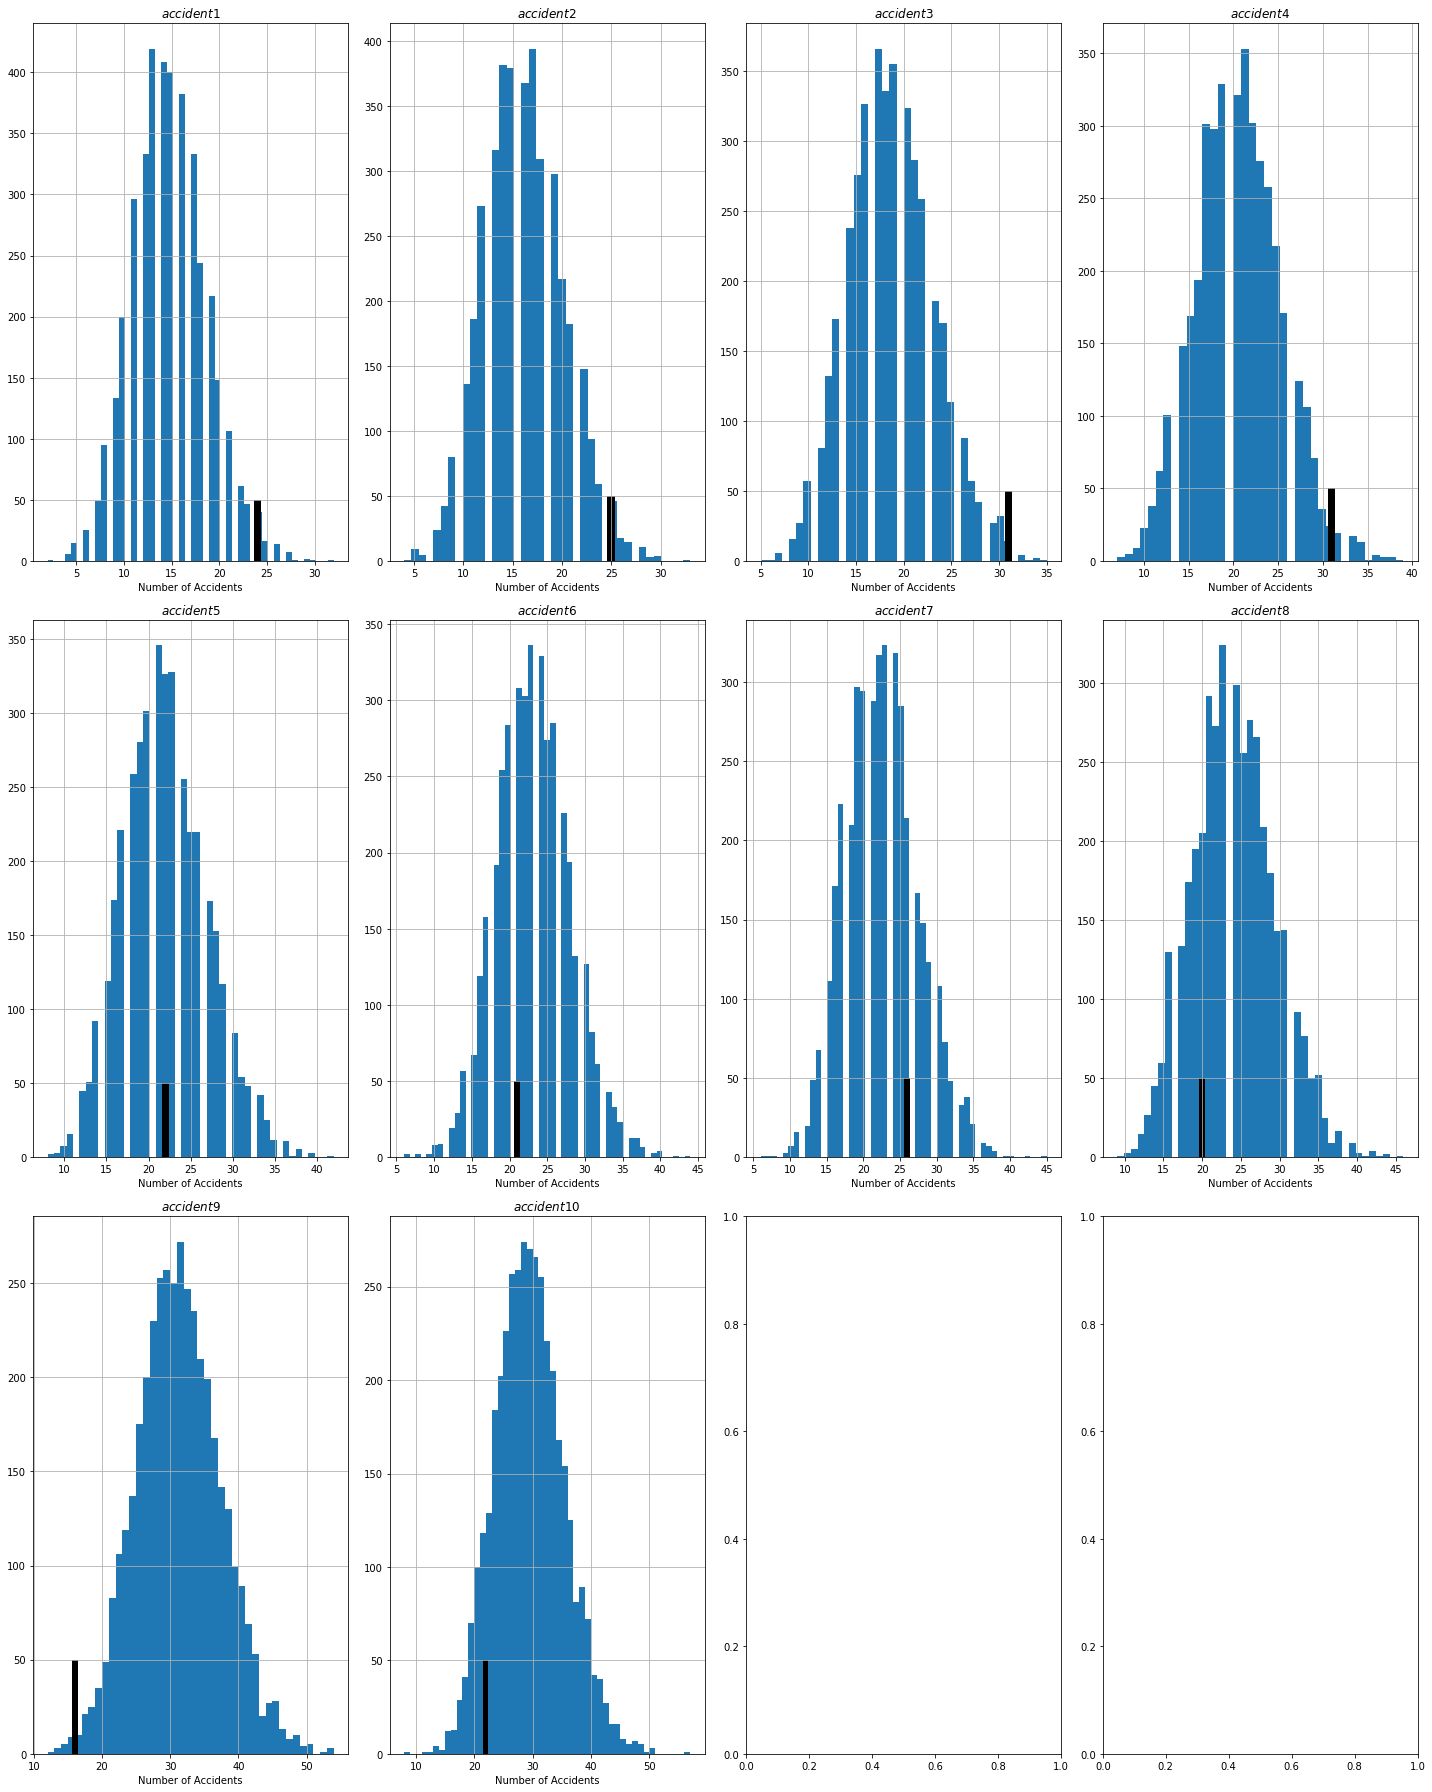

In [137]:
fig, ax = plt.subplots(3, 4, figsize=(20, 25))

for i in range(1, 11):
    ax[(i - 1) // 4][(i - 1) % 4].hist(df_2[f"accidents_number[{i}]"], bins='auto')
    ax[(i - 1) // 4][(i - 1) % 4].bar(data["Fatal accidents"][i - 1], 50, color="black")
    ax[(i - 1) // 4][(i - 1) % 4].set_title(f"$accident{{{i}}}$")
    ax[(i - 1) // 4][(i - 1) % 4].grid()

    # Set x-axis label and y-axis label
    ax[(i - 1) // 4][(i - 1) % 4].set_xlabel('Number of Accidents')

plt.tight_layout()  # Add tight layout to prevent overlapping of subplots
plt.show()



In [140]:
model_log=CmdStanModel(stan_file='code3.stan')
# Define data dictionary
data_dict = {
    'N': len(data),
    'miles': data["Miles flown [100 mln miles]"].values,
    'accidents_number' : data["Fatal accidents"]
}
# Perform posterior predictive checks
sim3 = model_log.sample(data=data_dict, output_dir='output')
ppc_summary_3 = sim3.summary()
print(ppc_summary_3)

11:29:00 - cmdstanpy - INFO - compiling stan file /home/lab5/code3.stan to exe file /home/lab5/code3
11:29:11 - cmdstanpy - INFO - compiled model executable: /home/lab5/code3
11:29:11 - cmdstanpy - WARNING - Stan compiler has produced 3 warnings:
11:29:11 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab5/code3.hpp /home/lab5/code3.stan
Warning in '/home/lab5/code3.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/code3.stan', line 8, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/c


11:29:13 - cmdstanpy - INFO - CmdStan done processing.



                           Mean          MCSE     StdDev         5%  \
theta                  0.000099  7.881690e-07   0.000050   0.000017   
alfa[1]                2.499990  1.558850e-05   0.000989   2.498390   
alfa[2]                2.499980  1.605730e-05   0.001009   2.498320   
alfa[3]                2.500020  1.560550e-05   0.000996   2.498340   
alfa[4]                2.500020  1.543850e-05   0.001008   2.498370   
alfa[5]                2.499990  1.608240e-05   0.001003   2.498290   
alfa[6]                2.500010  1.565360e-05   0.000991   2.498420   
alfa[7]                2.500010  1.618010e-05   0.001020   2.498360   
alfa[8]                2.499990  1.557430e-05   0.000993   2.498390   
alfa[9]                2.499980  1.596850e-05   0.000992   2.498360   
alfa[10]               2.500020  1.649140e-05   0.001006   2.498360   
lambda[1]             18.224100  5.580310e-02   3.561110  13.000000   
lambda[2]             19.118600  6.528500e-02   4.165320  13.090600   
lambd

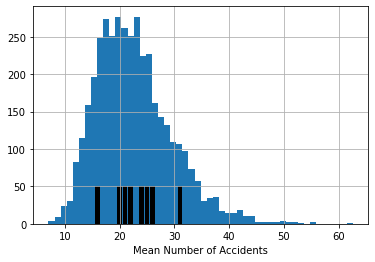

In [142]:
df_3 = sim3.draws_pd()
df_3["number_of_accidents_mean"] = df_3[[f"accidents_number[{i}]" for i in range(1, 11)]].mean(axis=1)
df_3["number_of_accidents_mean"].hist(bins=50)
plt.bar(data["Fatal accidents"], [50 for _ in range(data["Fatal accidents"].size)], color = "black")
plt.xlabel("Mean Number of Accidents")
plt.show()

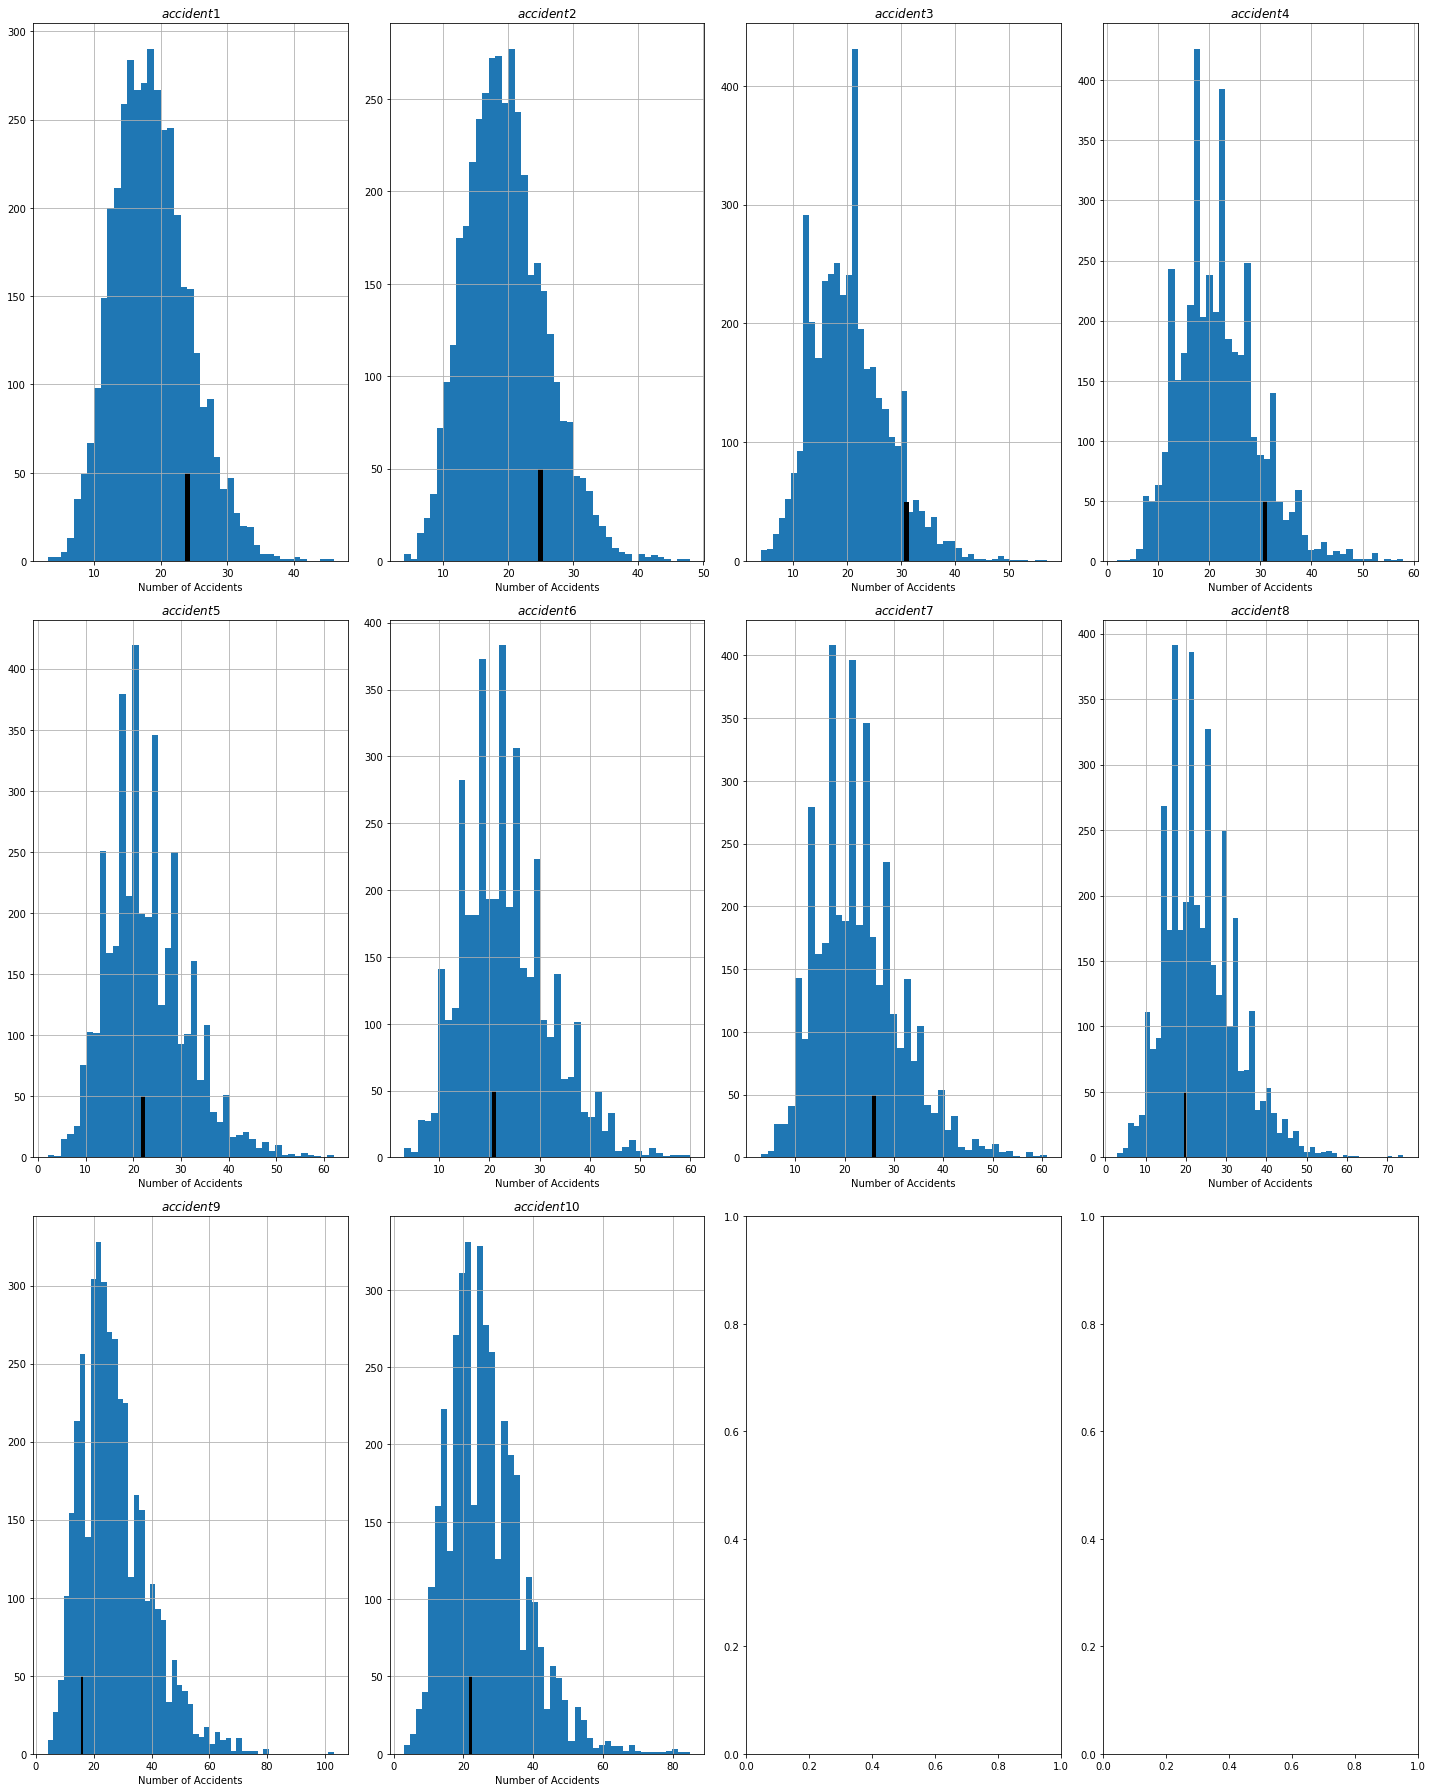

In [143]:
fig, ax = plt.subplots(3, 4, figsize=(20, 25))

for i in range(1, 11):
    ax[(i - 1) // 4][(i - 1) % 4].hist(df_3[f"accidents_number[{i}]"], bins='auto')
    ax[(i - 1) // 4][(i - 1) % 4].bar(data["Fatal accidents"][i - 1], 50, color="black")
    ax[(i - 1) // 4][(i - 1) % 4].set_title(f"$accident{{{i}}}$")
    ax[(i - 1) // 4][(i - 1) % 4].grid()

    # Set x-axis label and y-axis label
    ax[(i - 1) // 4][(i - 1) % 4].set_xlabel('Number of Accidents')

plt.tight_layout()  # Add tight layout to prevent overlapping of subplots
plt.show()

In [155]:
model_fit2=CmdStanModel(stan_file='code4.stan')
# Define data dictionary
data_dict = {
    'N': len(data),
    'miles': data["Miles flown [100 mln miles]"].values,
    'accidents' : data["Fatal accidents"]
}
# Perform posterior predictive checks
sim4 = model_fit2.sample(data=data_dict, output_dir='output')
ppc_summary_4 = sim4.summary()
print(ppc_summary_4)

11:34:41 - cmdstanpy - INFO - compiling stan file /home/lab5/code4.stan to exe file /home/lab5/code4
11:34:55 - cmdstanpy - INFO - compiled model executable: /home/lab5/code4
11:34:55 - cmdstanpy - WARNING - Stan compiler has produced 2 warnings:
11:34:55 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab5/code4.hpp /home/lab5/code4.stan
Warning in '/home/lab5/code4.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/code4.stan', line 4, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking 


11:34:58 - cmdstanpy - INFO - CmdStan done processing.



                            Mean      MCSE    StdDev         5%         50%  \
lp__                  506.120000  0.053025  2.358360  501.71300  506.472000   
alfa[1]                 2.499990  0.000015  0.000995    2.49834    2.500000   
alfa[2]                 2.500020  0.000016  0.000991    2.49839    2.500030   
alfa[3]                 2.500000  0.000017  0.000983    2.49837    2.500000   
alfa[4]                 2.499990  0.000016  0.001001    2.49834    2.500000   
alfa[5]                 2.500020  0.000019  0.001016    2.49830    2.500010   
alfa[6]                 2.499980  0.000015  0.001037    2.49829    2.499990   
alfa[7]                 2.500030  0.000016  0.001004    2.49836    2.500040   
alfa[8]                 2.499990  0.000016  0.000998    2.49834    2.500020   
alfa[9]                 2.500010  0.000015  0.001004    2.49835    2.500030   
alfa[10]                2.500000  0.000015  0.000976    2.49838    2.500010   
theta                   0.000108  0.000000  0.00001

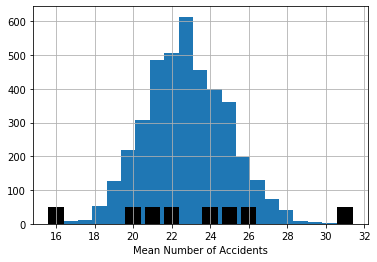

In [156]:
df_4 = sim4.draws_pd()
df_4["number_of_accidents_mean"] = df_4[[f"accidents_number[{i}]" for i in range(1, 11)]].mean(axis=1)
df_4["number_of_accidents_mean"].hist(bins=20)
plt.bar(data["Fatal accidents"], [50 for _ in range(data["Fatal accidents"].size)], color = "black")
plt.xlabel("Mean Number of Accidents")
plt.show()

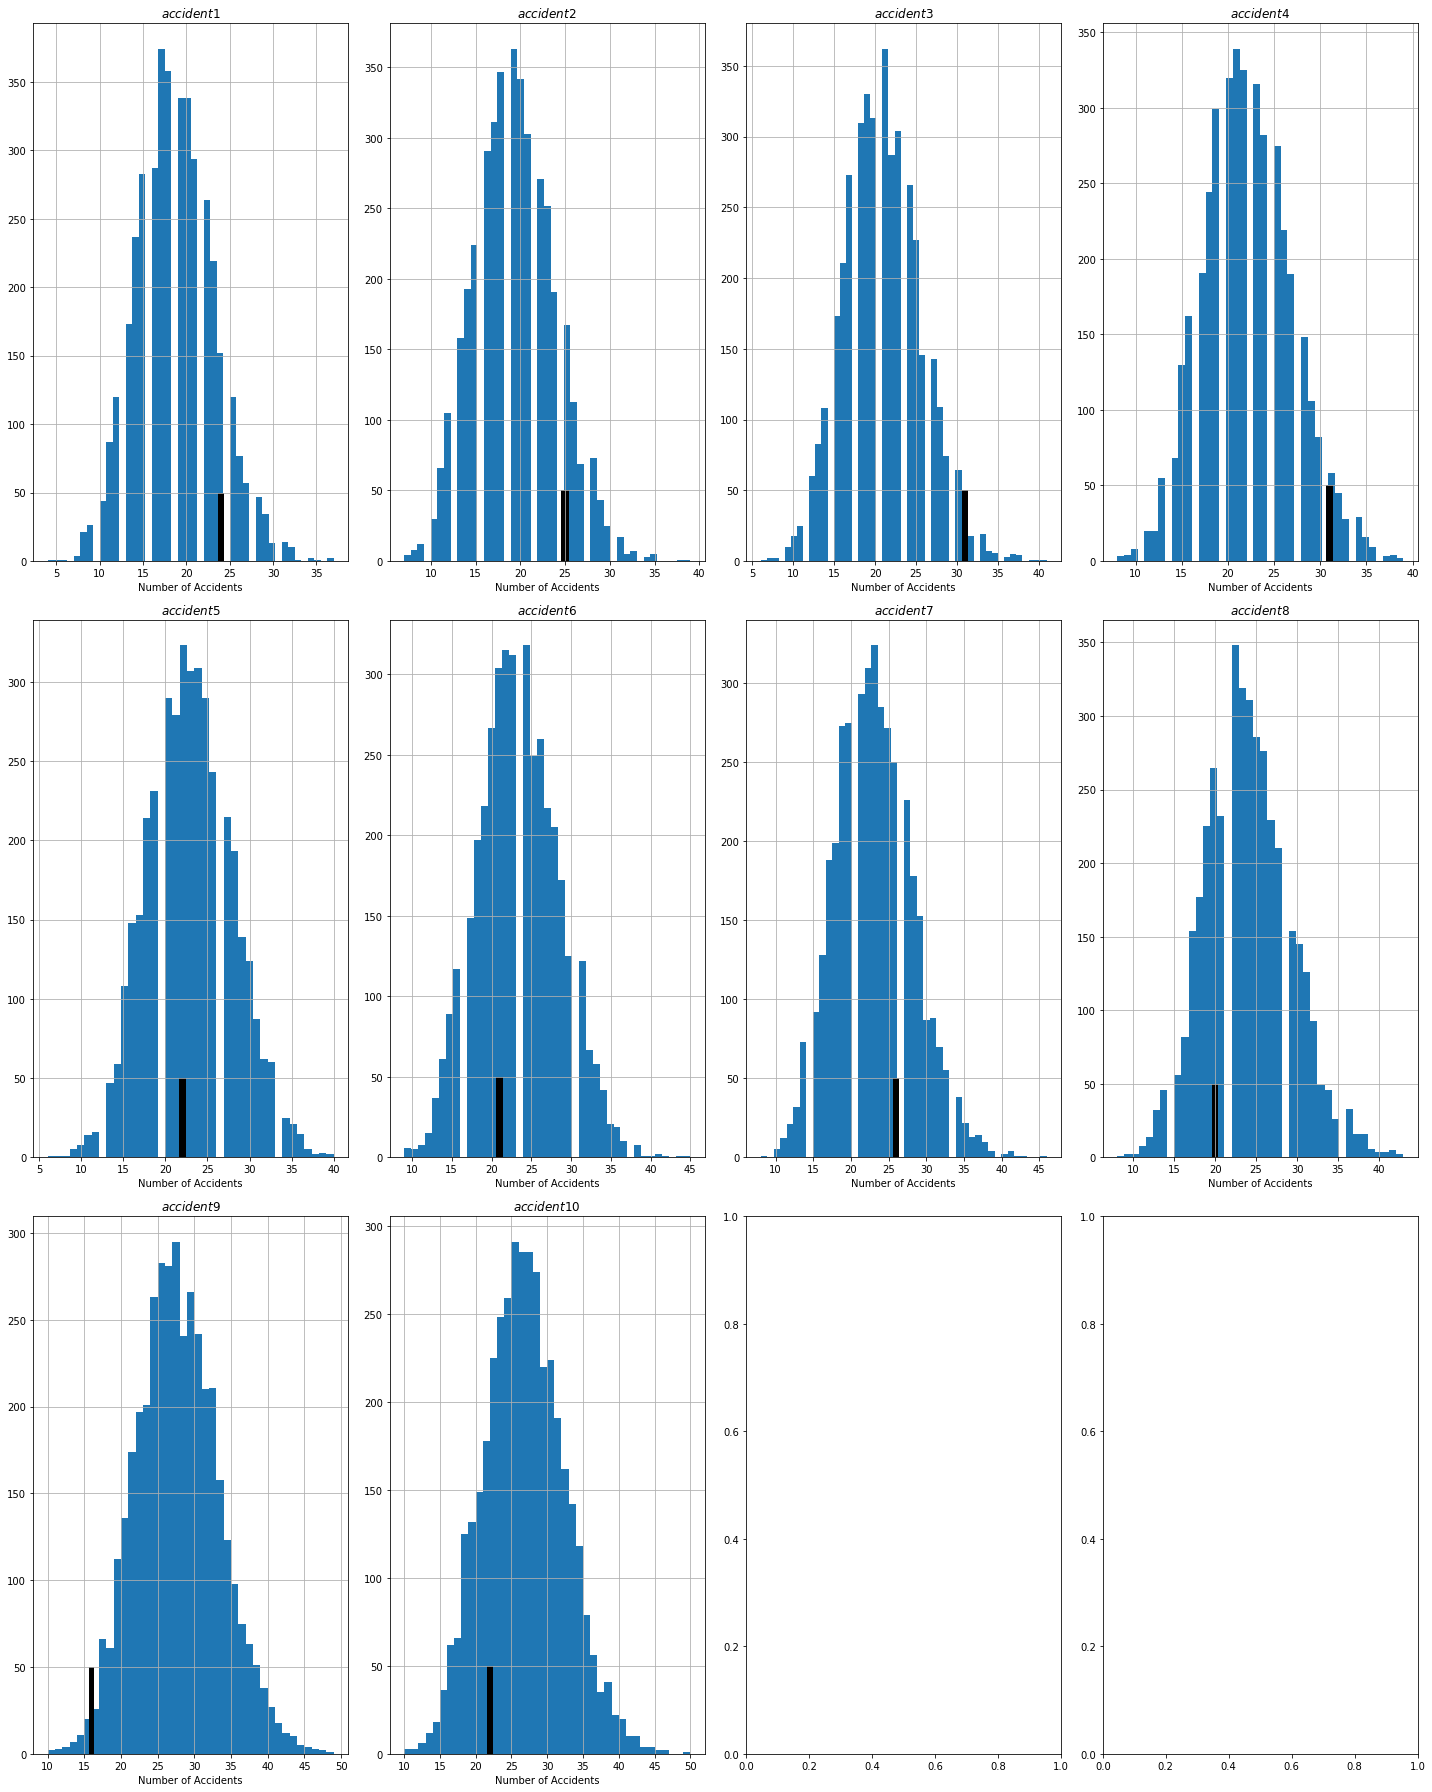

In [157]:
fig, ax = plt.subplots(3, 4, figsize=(20, 25))

for i in range(1, 11):
    ax[(i - 1) // 4][(i - 1) % 4].hist(df_4[f"accidents_number[{i}]"], bins='auto')
    ax[(i - 1) // 4][(i - 1) % 4].bar(data["Fatal accidents"][i - 1], 50, color="black")
    ax[(i - 1) // 4][(i - 1) % 4].set_title(f"$accident{{{i}}}$")
    ax[(i - 1) // 4][(i - 1) % 4].grid()

    # Set x-axis label and y-axis label
    ax[(i - 1) // 4][(i - 1) % 4].set_xlabel('Number of Accidents')

plt.tight_layout()  # Add tight layout to prevent overlapping of subplots
plt.show()